In [36]:
# this notebook demonstrates some basic functionality of the gaiamock package. 
import numpy as np
import matplotlib.pyplot as plt
import gaiamock
from astropy.coordinates import SkyCoord
from astropy import constants as const
from astropy import units as u
from tqdm.auto import tqdm
%matplotlib inline

# read in the compiled C functions
c_funcs = gaiamock.read_in_C_functions()

# Predict astrometry for GJ 876

In [2]:
# Data from: https://exoplanetarchive.ipac.caltech.edu/overview/GJ%20876

# Star parameters: GJ876
GJ876_coord = SkyCoord(ra='22h53m17.75s', dec='-14d15m59.74s')
GJ876_ra = GJ876_coord.ra.deg # RA
GJ876_dec = GJ876_coord.dec.deg # DEC 
GJ876_stellarmass = (0.36960720960300*u.M_sun).value # Mass of star [M_sun]
GJ876_parallax = 213.867 # Parallax [mas]
GJ876_pmra = 957.961 # Proper motion RA component [mas/yr]
GJ876_pmdec = -673.638 # Proper motion DEC component [mas/yr]
GJ876_m_gaia = 8.87530 # m_gaia apparent magnitude 

# Largest planet parameters: GJ876b 
GJ876b_mass = (2.2756*const.M_jup).to('M_sun').value # Planet mass [M_sun]
GJ876b_w = (50.3*u.deg).to('rad').value # Argument of periastron
GJ876b_inc = (59*u.deg).to('rad').value # Inclination angle 
GJ876b_omega = (251*u.deg).to('rad').value # Longitude of ascending node, taken from: https://ui.adsabs.harvard.edu/abs/2009A%26A...496..249B/abstract
GJ876b_Tp = 2450602.093 # Epoch of periastron [days]
GJ876b_period = 61.1166 # Orbital period [days]
GJ876b_ecc = 0.0324 # Eccentricity 

In [76]:
# retrieve the scan times and angles for a particular sky location and data release 
scan_metadata = gaiamock.get_gost_one_position(ra=294.8278625082, dec=14.9309796086, data_release='dr4')
scan_metadata

Target,ra[rad],dec[rad],CcdRow[1-7],scanAngle[rad],parallaxFactorAlongScan,ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]
int64,float64,float64,int64,float64,float64,float64
18258,5.1541754472957555,0.2634537347745939,3,-0.556873385393781,0.5814247329992646,2456923.735552224
18258,5.1541754472957555,0.2634537347745939,1,-0.5547523940104774,0.5795108939137935,2456923.809609938
18258,5.1541754472957555,0.2634537347745939,2,-0.07074335613185286,-0.47765282843085805,2456994.66347224
18258,5.1541754472957555,0.2634537347745939,5,-0.08225774293159145,-0.4706262884051641,2456994.839563199
18258,5.1541754472957555,0.2634537347745939,7,-0.08712717061079003,-0.46765270971770523,2456994.913621182
18258,5.1541754472957555,0.2634537347745939,7,-1.2124181977526527,0.2096411737272055,2457010.345065254
...,...,...,...,...,...,...
18258,5.1541754472957555,0.2634537347745939,5,-1.2706601668276023,0.393903841342649,2458461.933151151
18258,5.1541754472957555,0.2634537347745939,4,-2.4397731764076416,-0.6810007625248542,2458580.102273193


In [84]:
scan_metadata = gaiamock.get_gost_one_position(ra=GJ876_ra, dec=GJ876_dec, data_release='dr4')
scan_metadata

Target,ra[rad],dec[rad],CcdRow[1-7],scanAngle[rad],parallaxFactorAlongScan,ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]
int64,float64,float64,int64,float64,float64,float64
30580,5.988660995905543,-0.24193666252299698,1,-1.0053668345865057,0.4250853847343958,2456958.8265183615
30580,5.988660995905543,-0.24193666252299698,4,0.3365597237618727,-0.6654471727394095,2456979.6490484443
30580,5.988660995905543,-0.24193666252299698,2,-2.9425767913897127,-0.543805144616909,2457144.674047813
30580,5.988660995905543,-0.24193666252299698,7,-2.9493564006398616,-0.5395039184026723,2457144.8501641806
30580,5.988660995905543,-0.24193666252299698,7,1.958449680613782,0.7183263839409154,2457169.1728548645
30580,5.988660995905543,-0.24193666252299698,4,-2.791581676195737,-0.6079624760366282,2457197.593045321
...,...,...,...,...,...,...
30580,5.988660995905543,-0.24193666252299698,5,-3.1251603595384836,-0.3810118415793852,2458596.4388624253
30580,5.988660995905543,-0.24193666252299698,2,1.982884585458263,0.6397881210896859,2458615.1193474205


In [46]:
# generate mock astrometry of a binary: 

# assume flux ratio of 0
t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = GJ876_ra, dec= GJ876_dec, 
                        parallax = GJ876_parallax, pmra = GJ876_pmra, pmdec = GJ876_pmdec, m1 = GJ876_stellarmass, 
                        m2 = GJ876b_mass, period = GJ876b_period, Tp = GJ876b_Tp, ecc = GJ876b_ecc, 
                        omega = GJ876b_omega, inc = np.pi - GJ876b_inc, w = GJ876b_w, phot_g_mean_mag = GJ876_m_gaia, f = 0.0, data_release = 'dr3',
                        c_funcs = c_funcs)

t_ast_yr_Planet, psi_Planet, plx_factor_Planet, ast_obs_Planet, ast_err_Planet = t_ast_yr, psi, plx_factor, ast_obs, ast_err

ruwe_Planet, mu_Planet, sigma_mu_Planet = gaiamock.check_ruwe(t_ast_yr_Planet, psi_Planet, plx_factor_Planet, ast_obs_Planet, ast_err_Planet)
print(ruwe_Planet)

1.4858547741689814


In [ ]:
# generate mock astrometry of a binary: 

# assume flux ratio of 0

# try for gaia BH3 

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 294.8278625082, dec= 14.9309796086, 
                        parallax = GJ876_parallax, pmra = GJ876_pmra, pmdec = GJ876_pmdec, m1 = GJ876_stellarmass, 
                        m2 = GJ876b_mass, period = GJ876b_period, Tp = GJ876b_Tp, ecc = GJ876b_ecc, 
                        omega = GJ876b_omega, inc = np.pi - GJ876b_inc, w = GJ876b_w, phot_g_mean_mag = GJ876_m_gaia, f = 0.0, data_release = 'dr3',
                        c_funcs = c_funcs)

t_ast_yr_Planet, psi_Planet, plx_factor_Planet, ast_obs_Planet, ast_err_Planet = t_ast_yr, psi, plx_factor, ast_obs, ast_err

ruwe_Planet, mu_Planet, sigma_mu_Planet = gaiamock.check_ruwe(t_ast_yr_Planet, psi_Planet, plx_factor_Planet, ast_obs_Planet, ast_err_Planet)
print(ruwe_Planet)

In [74]:
len(t_ast_yr_Planet)

18

Text(0, 0.5, '$\\eta\\,[\\rm mas]$')

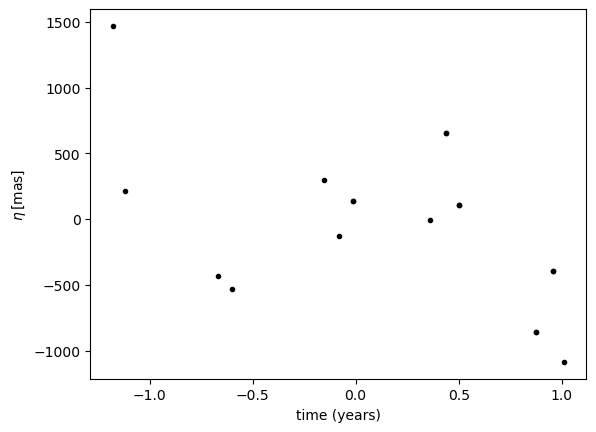

In [47]:
plt.errorbar(t_ast_yr_Planet, ast_obs_Planet, yerr=ast_err_Planet, fmt='k.')
plt.xlabel('time (years)')
plt.ylabel(r'$\eta\,[\rm mas]$')

single star chi2: 180.88
binary star chi2: 14.88


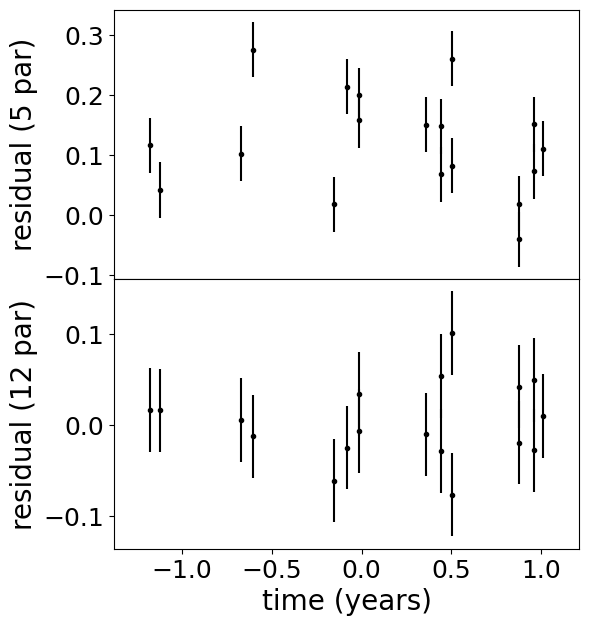

In [48]:
# try fitting the astrometry with a 5-parameter (single-star) model and plot the residuals. 
# also plot the residuals compared to the (known) true binary solution. 

gaiamock.plot_residuals(t_ast_yr_Planet, psi_Planet, plx_factor_Planet, ast_obs_Planet, ast_err_Planet, theta_array=[GJ876b_period, GJ876b_Tp*2*np.pi/GJ876b_period, GJ876b_ecc], c_funcs=c_funcs)

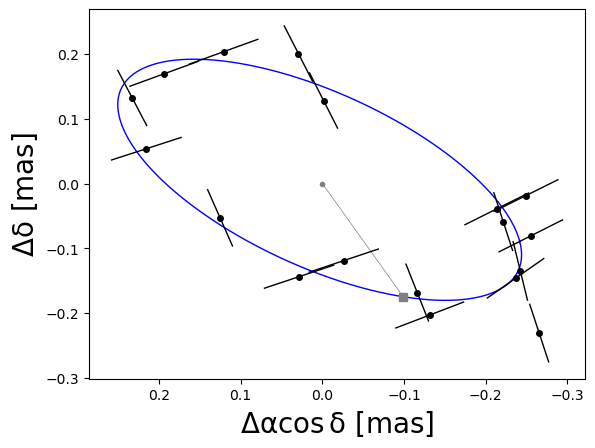

In [49]:
# want to plot the orbit in 2D?

# get the linear parameters 
period, Tp, ecc = GJ876b_period, GJ876b_Tp, GJ876b_ecc
phi_p = 2*np.pi*Tp/period
chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear


gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr, psi=psi, plx_factor=plx_factor, 
            ast_obs=ast_obs, ast_err=ast_err, period = period, ecc=ecc, Tp=Tp, 
            delta_ra=ra_off, delta_dec=dec_off, parallax=plx, pmra=pmra, pmdec=pmdec,
            data_release='dr3', A=A, B=B, F=F, G=G, c_funcs=c_funcs)

found best-fit nonlinear parameters: [61.20141073  5.91753842  0.08727937]
single star chi2: 353.86
binary star chi2: 18.72
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: -0.3
a0_over_err is NOT high enough to pass DR3 cuts! a0_over_err: 13.7
parallax over error is high enough to pass DR3 cuts! parallax_over_error: 11283.5
eccentricity error is too high to pass DR3 cuts! ecc_error: 0.17
------------Orbital Solution Parameters------------
Parallax (mas): 213.8995820241269 ± 0.018956848498407647
Period (days): 61.20141073489262 ± 0.14786962980292542
Eccentricity: 0.08727937466107173 ± 0.16575874933319548
Inclination (deg): 64.57687461733957
a0_mas: 0.30246886945557994 ± 0.02209632624934315
RUWE: 1.4398357643108148


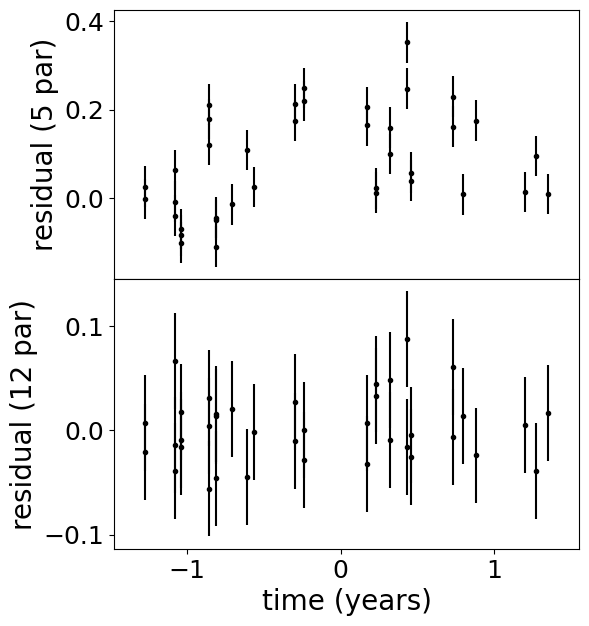

In [79]:
# now try running the full pipeline for the same parameters. That is, generate mock astrometry for a binary with 
# these parameters, and fit it with the cascade of astrometric models used in DR3. Stop when the first model is accepted.

results_array_GJ876 = gaiamock.run_full_astrometric_cascade(ra = 294.8278625082, dec= 14.9309796086, parallax = GJ876_parallax, 
                        pmra = GJ876_pmra, pmdec = GJ876_pmdec, m1 = GJ876_stellarmass, m2 = GJ876b_mass, 
                        period = GJ876b_period, Tp = GJ876b_Tp, ecc = GJ876b_ecc, omega = GJ876b_omega, inc_deg = GJ876b_inc*180/np.pi, 
                        w = GJ876b_w, phot_g_mean_mag = GJ876_m_gaia, f = 0.0, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True, ruwe_min=1.25, skip_acceleration=True)

print("------------Orbital Solution Parameters------------")
print("Parallax (mas): %s ± %s"%(results_array_GJ876[0], results_array_GJ876[1]))
print("Period (days): %s ± %s"%(results_array_GJ876[10], results_array_GJ876[11]))
print("Eccentricity: %s ± %s"%(results_array_GJ876[14], results_array_GJ876[15]))
print("Inclination (deg): %s"%(results_array_GJ876[16]))
print("a0_mas: %s ± %s"%(results_array_GJ876[17], results_array_GJ876[18]))
print("RUWE: %s"%(results_array_GJ876[-1]))

found best-fit nonlinear parameters: [61.04326611  1.00170474  0.07116956]
single star chi2: 579.67
binary star chi2: 58.62
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: 0.8
a0_over_err is NOT high enough to pass DR3 cuts! a0_over_err: 17.0
parallax over error is high enough to pass DR3 cuts! parallax_over_error: 13345.7
eccentricity error is too high to pass DR3 cuts! ecc_error: 0.10
------------Orbital Solution Parameters------------
Parallax (mas): 213.88385517411518 ± 0.016026422280592968
Period (days): 61.04326610693294 ± 0.08169490501127538
Eccentricity: 0.07116955828936718 ± 0.09901533848994166
Inclination (deg): 57.00164782102006
a0_mas: 0.29833170641241286 ± 0.017503050201943888
RUWE: 1.554357866924146


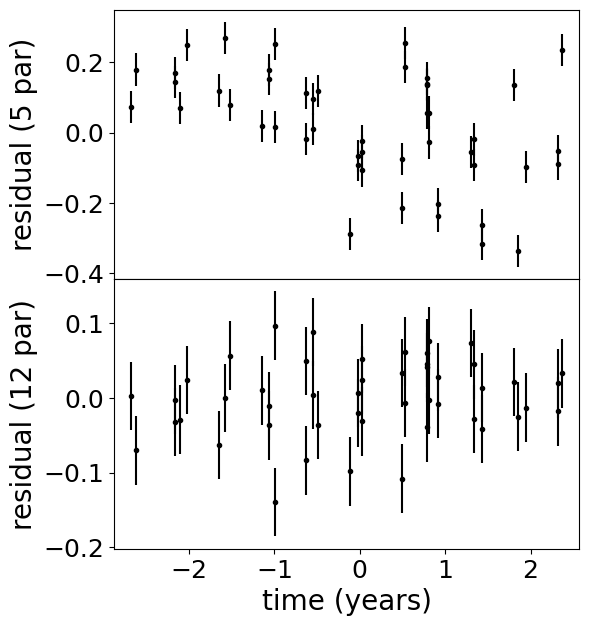

In [86]:
# now try running the full pipeline for the same parameters. That is, generate mock astrometry for a binary with 
# these parameters, and fit it with the cascade of astrometric models used in DR3. Stop when the first model is accepted.

results_array_GJ876 = gaiamock.run_full_astrometric_cascade(ra = GJ876_ra, dec= GJ876_dec, parallax = GJ876_parallax, 
                        pmra = GJ876_pmra, pmdec = GJ876_pmdec, m1 = GJ876_stellarmass, m2 = GJ876b_mass, 
                        period = GJ876b_period, Tp = GJ876b_Tp, ecc = GJ876b_ecc, omega = GJ876b_omega, inc_deg = GJ876b_inc*180/np.pi, 
                        w = GJ876b_w, phot_g_mean_mag = GJ876_m_gaia, f = 0.0, data_release = 'dr4',
                        c_funcs = c_funcs, verbose=True, show_residuals=True, ruwe_min=1.4, skip_acceleration=False)

print("------------Orbital Solution Parameters------------")
print("Parallax (mas): %s ± %s"%(results_array_GJ876[0], results_array_GJ876[1]))
print("Period (days): %s ± %s"%(results_array_GJ876[10], results_array_GJ876[11]))
print("Eccentricity: %s ± %s"%(results_array_GJ876[14], results_array_GJ876[15]))
print("Inclination (deg): %s"%(results_array_GJ876[16]))
print("a0_mas: %s ± %s"%(results_array_GJ876[17], results_array_GJ876[18]))
print("RUWE: %s"%(results_array_GJ876[-1]))

In [14]:
GJ876b_predicted_mass = (gaiamock.get_companion_mass_from_mass_function(GJ876_stellarmass, a0_mas=results_array_GJ876[17], 
                                   period=results_array_GJ876[10], parallax=results_array_GJ876[0], fluxratio=0) * u.M_sun).to('M_jup')
GJ876b_predicted_mass

<Quantity 6.62430363 jupiterMass>

Text(0, 0.5, 'RV (km/s)')

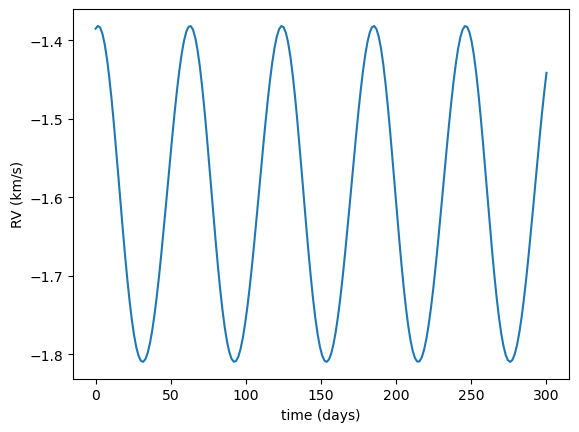

In [24]:
# You can also use this code to (quickly) calculate RV curves. 
rv_time_grid = np.linspace(0, 300, 200)
rv_curve = gaiamock.predict_radial_velocities(t_rvs_day = rv_time_grid, period = GJ876b_period, Tp = GJ876b_Tp, ecc = GJ876b_ecc, 
                                              w = GJ876b_w, K = 214/1000, gamma = -1.6, c_funcs = c_funcs)
plt.plot(rv_time_grid, rv_curve)
plt.xlabel('time (days)')
plt.ylabel('RV (km/s)')

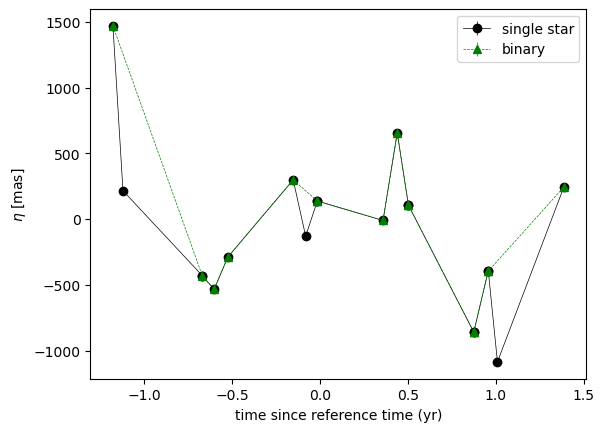

In [42]:
# what if you want to predict astromety from a single star? There's a function for that

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_single_source(ra = GJ876_ra, dec=GJ876_dec, 
            parallax = GJ876_parallax, pmra = GJ876_pmra, pmdec = GJ876_pmdec, phot_g_mean_mag = GJ876_m_gaia, data_release = 'dr3', c_funcs = c_funcs)

plt.errorbar(t_ast_yr, ast_obs, yerr=ast_err, fmt='ko', linestyle='-', linewidth=0.5, label='single star')
plt.xlabel('time since reference time (yr)')
plt.ylabel(r'$\eta\,\,[\rm mas]$')

plt.errorbar(t_ast_yr_Planet, ast_obs_Planet, yerr=ast_err_Planet, fmt='g^', linestyle='--', linewidth=0.5, label='binary')

plt.legend()

In [16]:
# try fitting a 5-parameter solution and checking its ruwe (really UWE)
# here mu and sigma_mu are ra, pmra, dec, pmdec, plx, and the corresponding uncertainties
ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
print(ruwe)

1.4200041143180866


# Simulate planet system

## Try to recreate Figure 16 from El-Badry paper

In [26]:
# What's the probability that a binary with some properties would have gotten an orbital solution in DR3?
# simulate a 100 binaries all across the sky, within a 500 pc volume, and report the outcomes
# ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
#     d_min = 0, d_max = 30, period = 500, Mg_tot = 4.5, f = 0.0, m1 = 0.3, m2 = (5*u.M_jup).to('M_sun').value, ecc = 0.2, 
#     N_realizations = 100, data_release='dr3', do_dust=True)

In [27]:
# plot the sky distribution of the ones that did and did not get accepted with orbital solutions. 
# plt.plot(ra[accept], dec[accept], 'ko')
# plt.plot(ra[~accept], dec[~accept], 'ro')
# plt.xlabel('RA (deg)')
# plt.ylabel('Dec (deg)')

In [28]:
# and their distances. 
# plt.plot(d_pc[accept], phot_g_mean_mag[accept], 'ko')
# plt.plot(d_pc[~accept], phot_g_mean_mag[~accept], 'ro')
# plt.xlabel('distance (pc)')
# plt.ylabel('G (mag)')

In [37]:
# what if we want everything at the same distance (e.g. if we want to make plots like Figs 12-15 of the paper)?
# the simplest approach is to set d_min and d_max to a narrow range, e.g:
dist_pc = 30
d_min, d_max = 0.99*dist_pc, 1.01*dist_pc

planet_mass_range = np.arange(1, 10.25, 0.25) 
DR3_DP = np.zeros(len(planet_mass_range)) # DR3 detection probabilities 
DR4_DP = np.zeros(len(planet_mass_range)) # DR3 detection probabilities 

for i,M in enumerate(tqdm(planet_mass_range)):
    ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
        d_min = d_min, d_max = d_max, period = 500, Mg_tot = 4.5, f = 0.0, m1 = 0.3, m2 = (M*u.M_jup).to('M_sun').value, ecc = 0.2, 
        N_realizations = 100, data_release='dr3', do_dust=True)
    DR3_DP[i] = np.count_nonzero(accept)/100

# try with dr4 as well 

  0%|          | 0/37 [00:00<?, ?it/s]

0 out of 100 solutions had insufficient visibility periods
100 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
0 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions but failed at least one cut. 
0 out of 100 solutions had insufficient visibility periods
100 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
0 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions but failed at least one cut. 
0 out of 100 solutions had insufficient visibility periods
100 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
0 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions b

KeyboardInterrupt: 

In [ ]:
DR4_DP = np.zeros(len(planet_mass_range)) # DR3 detection probabilities 

for i,M in enumerate(tqdm(planet_mass_range)):
    ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
        d_min = d_min, d_max = d_max, period = 500, Mg_tot = 6.5, f = 0.0, m1 = 0.3, m2 = (5*u.M_jup).to('M_sun').value, ecc = 0.2, 
        N_realizations = 100, data_release='dr4', do_dust=True)
    DR4_DP[i] = np.count_nonzero(accept)/100

In [28]:
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
        d_min = d_min, d_max = d_max, period = 500, Mg_tot = 6.5, f = 0.0, m1 = 0.3, m2 = (5*u.M_jup).to('M_sun').value, ecc = 0.2, 
        N_realizations = 500, data_release='dr3', do_dust=True)



40100) and linked library (v34700).

40100) and linked library (v).

34700).









).


































0 out of 500 solutions had insufficient visibility periods
11 out of 500 solutions had ruwe < 1.4
69 out of 500 solutions got 9-parameter solutions
6 out of 500 solutions got 7-parameter solutions
354 out of 500 solutions passed all cuts and got an orbital solution!
60 out of 500 solutions got to orbital solutions but failed at least one cut. 


Text(0, 0.5, 'Dec (deg)')

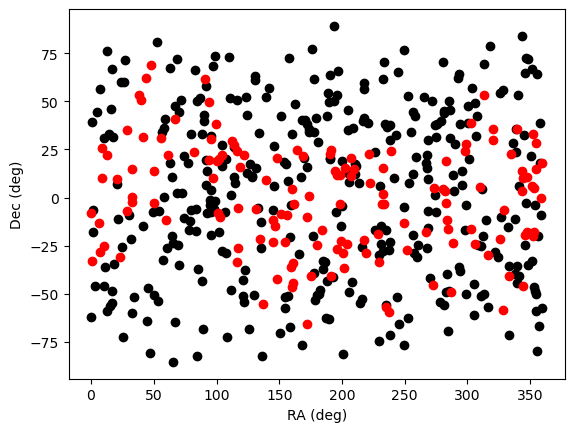

In [29]:
#plot the sky distribution of the ones that did and did not get accepted with orbital solutions. 
plt.plot(ra[accept], dec[accept], 'ko')
plt.plot(ra[~accept], dec[~accept], 'ro')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

In [33]:
accepted_hist = np.histogram2d(ra[accept], dec[accept], bins=[np.arange(0, 370, 50), np.arange(-90, 100, 25)])
total_hist = np.histogram2d(ra[accept], dec[accept], bins=[np.arange(0, 370, 50), np.arange(-90, 100, 25)])

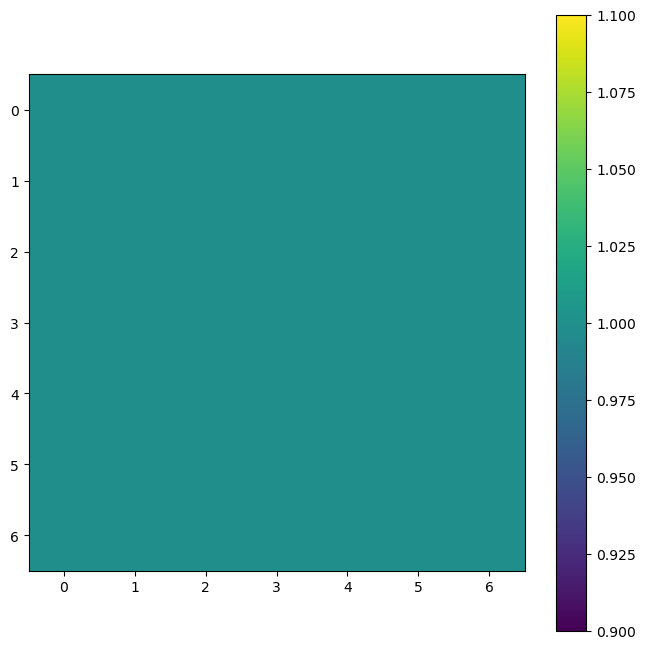

In [34]:
plt.figure(figsize=(8,8))
plt.imshow(np.divide(accepted_hist[0], total_hist[0], where=total_hist[0] > 0))
plt.colorbar()

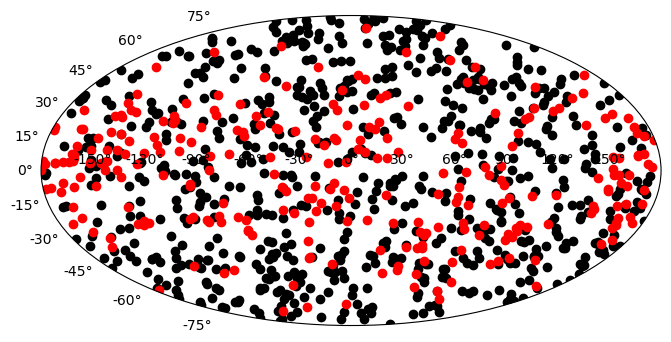

In [112]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(((ra[accept] - 180)*u.deg).to('radian'), (dec[accept]*u.deg).to('radian'), c='k')
ax.scatter(((ra[~accept] - 180)*u.deg).to('radian'), (dec[~accept]*u.deg).to('radian'), c='red')
#ax.scatter(ra[~accept], dec[~accept])

In [100]:
(ra[accept]*u.deg).to('radian')

(dec[accept]*u.deg).to('radian')

<Quantity [ 0.8578054 ,  0.32386537,  0.6751331 , -0.44928418,  0.68286984,
           -0.55615401, -0.26883927,  0.31825818, -1.00551296, -1.21690143,
           -0.11311536,  1.07784291, -0.82173283, -0.59281161,  0.23481078,
            0.09071992, -0.46276644, -0.54135133,  1.01923284,  0.63541305,
           -0.78818158, -1.25651841,  0.84698627, -1.17071568,  0.12109622,
            1.23003761,  0.42576145, -0.00730049, -0.77188051, -0.11915615,
            0.99826426,  0.9526295 , -0.33014091,  0.03013949, -1.15857334,
            0.91037581,  1.30879393, -0.13317017, -0.79351941,  1.00771421,
           -1.38863147, -0.99271508, -1.19075062, -1.06130449, -1.03670729,
           -0.60334916,  0.98100276,  0.6411287 ,  1.20948858,  0.95750734,
           -0.28540119,  0.71253546, -0.46047856,  1.06345383,  0.20612437,
           -1.00568372,  0.25080802,  0.84582278,  1.2963025 ,  0.02096094,
           -0.68124697,  1.28302193, -0.72632042, -0.32711744, -1.21658056,
           -

In [94]:
ra[accept]

array([344.15083378,   8.04896598, 154.84222804, 198.32544743,
       136.36886037,  55.28787887, 190.64114091,  91.98445692,
       106.12582868, 303.05323036, 131.88808114, 323.95682774,
        62.73334893,   0.97499893, 207.49229236,  74.96619211,
        52.64295897, 350.29767065,  76.69364467, 109.89811226,
       128.06999088, 106.13276454, 252.84508704, 358.86461473,
        20.91553394, 149.28551798, 271.76545515, 122.53464696,
       242.48159048, 292.27175886, 254.49503558, 138.02123934,
       199.29331569,  43.47787751, 268.98672355, 175.78560407,
        77.0842668 , 335.31172073,  95.75200091,  71.9341913 ,
       286.38939071, 352.41453211,  21.56772185, 310.54289734,
       128.90367409, 145.88848653, 215.47005288,  99.43477897,
       104.43579742,  29.1310832 , 174.64393015, 252.48892725,
       228.23582891, 134.33508873, 287.07382635, 306.6355036 ,
       275.84674899, 133.25688281,  67.66250867,  99.89445635,
       261.91453923,  59.39719897, 226.16077668, 291.02

Text(0, 0.5, 'detection probability')

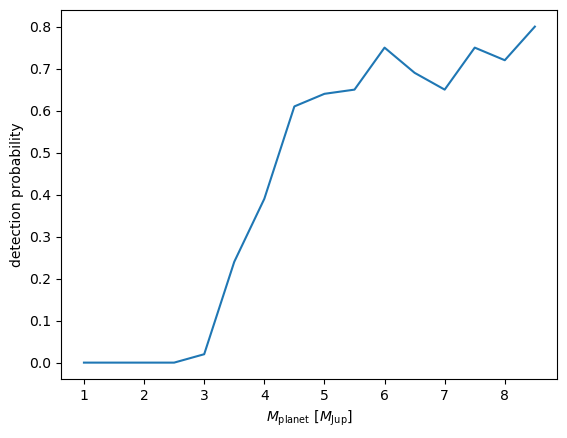

In [187]:
plt.plot(planet_mass_range, detection_probabilities)
plt.xlabel(r'$M_{\mathrm{planet}}$ [$M_{\mathrm{Jup}}$]')
plt.ylabel('detection probability')

# Unmodified demo code below

In [21]:
# We can also make predictions for DR4+:
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = d_min, d_max = d_max, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr4', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
100 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions but failed at least one cut. 


In [22]:
# Let's use the code to fit the real epoch astrometry for Gaia BH3 


bh3_ra_deg, bh3_dec_deg = 294.8278502411, 14.9309190720 # Right Ascension from paper Table 2
DR4_REFERENCE_EPOCH = 2457936.875

import pandas as pd
columns = 'transit_id ccd_id obs_time_tcb centroid_pos_al centroid_pos_error_al parallax_factor_al scan_pos_angle outlier_flag'.split()
gaia_astrometry = pd.read_csv('data/epochast.dat', names=columns, delim_whitespace=True, comment='#')

# remove outliers
gaia_astrometry = gaia_astrometry[gaia_astrometry['outlier_flag']!=1]

psi = np.array(np.deg2rad(gaia_astrometry['scan_pos_angle']))
t_ast_yr = (np.array(gaia_astrometry['obs_time_tcb']) - DR4_REFERENCE_EPOCH)/365.25
plx_factor = np.array(gaia_astrometry['parallax_factor_al'])
ast_obs, ast_err = np.array(gaia_astrometry['centroid_pos_al']), np.array(gaia_astrometry['centroid_pos_error_al'])

# bin the data (averaging across CCDs within a given FOV transit)
new_idx = np.concatenate([[0], np.arange(len(t_ast_yr)-1)[np.diff(t_ast_yr) > 1e-6] + 1])
psi_mean, t_ast_yr_mean, plx_factor_mean, ast_obs_mean, ast_err_mean = [], [], [], [], []
for i, idx in enumerate(new_idx):
    try:
        these_idx = np.arange(new_idx[i], new_idx[i+1])
    except IndexError:
        these_idx = np.arange(new_idx[i], len(t_ast_yr))
    psi_mean.append(np.mean(psi[these_idx]))
    t_ast_yr_mean.append(np.mean(t_ast_yr[these_idx]))
    plx_factor_mean.append(np.mean(plx_factor[these_idx]))
    ast_obs_mean.append( np.sum(ast_obs[these_idx] / ast_err[these_idx]**2) / np.sum(1 / ast_err[these_idx]**2) )
    ast_err_mean.append(np.sqrt(1 / np.sum(1 / ast_err[these_idx]**2)) )
psi_mean, t_ast_yr_mean, plx_factor_mean, ast_obs_mean, ast_err_mean = np.array(psi_mean), \
    np.array(t_ast_yr_mean), np.array(plx_factor_mean), np.array(ast_obs_mean), np.array(ast_err_mean)


single star chi2: 1835181.69
binary star chi2: 102.95


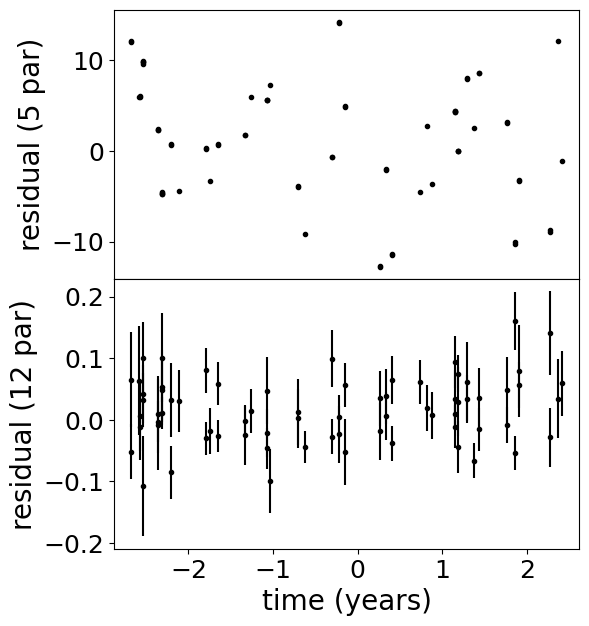

In [23]:
# run the fit!
res = gaiamock.fit_orbital_solution_nonlinear(t_ast_yr = t_ast_yr_mean, psi = psi_mean, 
        plx_factor = plx_factor_mean, ast_obs = ast_obs_mean, ast_err = ast_err_mean, c_funcs = c_funcs)

gaiamock.plot_residuals(t_ast_yr_mean, psi_mean, plx_factor_mean, ast_obs_mean, ast_err_mean, theta_array=res, c_funcs=c_funcs)

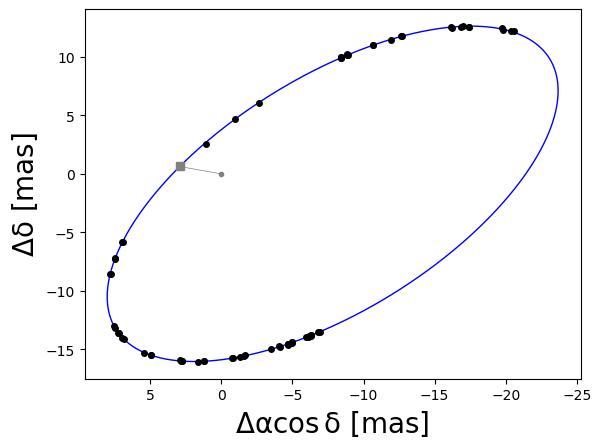

In [24]:
# make a 2D plot

# get the linear parameters 
period, phi_p, ecc = res
chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear


gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr_mean, psi=psi_mean, plx_factor=plx_factor_mean, 
            ast_obs=ast_obs_mean, ast_err=ast_err_mean, period = period, ecc=ecc, Tp=phi_p*period/(2*np.pi), 
            delta_ra=ra_off, delta_dec=dec_off, parallax=plx, pmra=pmra, pmdec=pmdec,
            data_release='dr4', A=A, B=B, F=F, G=G, c_funcs=c_funcs)


In [25]:
# There is also functionality to reject-sample orbits. This works well in the low-SNR regime, where optimization
# often fails to find the best solution. Let's put our binary from before far away, so the SNR is low...


t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 1.0, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 14.0, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)



In [26]:
# now let's evaluate the likelihood on 10^7 prior samples
samples = gaiamock.generate_prior_samples(N_samps = int(1e7), P_range = [100, 3000])
L = gaiamock.get_astrometric_likelihoods(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
                                         ast_obs = ast_obs, ast_err = ast_err, samples = samples)

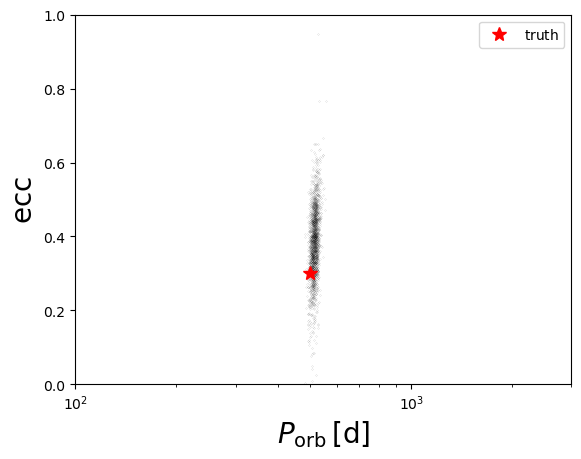

In [27]:
# use rejection sampling to discard the ones with low relative likelihoods

r = np.random.uniform(0, np.max(L), len(L))
keep = L > r

f = plt.figure()
ax = f.add_subplot(111)
ax.semilogx(np.array(samples).T[keep].T[0], np.array(samples).T[keep].T[1], 'k.', ms=0.1)
ax.set_xlim(100, 3000)
ax.set_xlabel(r'$P_{\rm orb}\,[\rm d]$', fontsize=20)
ax.set_ylabel(r'$\rm ecc$', fontsize=20)
ax.set_ylim(0, 1)
ax.plot([500], [0.3], 'r*', label = r'$\rm truth$', ms=10)
ax.legend(loc = 'upper right')

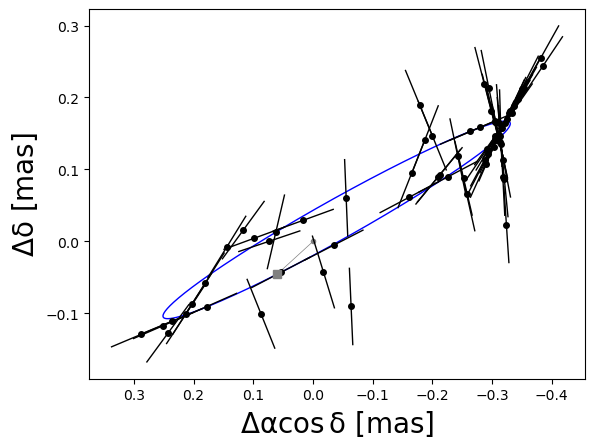

In [28]:
# plot the best-fit orbit
best = np.argmax(L)
period, ecc, phi_p = samples[0][best], samples[1][best], samples[2][best]
chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear


gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr, psi=psi, plx_factor=plx_factor, 
            ast_obs=ast_obs, ast_err=ast_err, period = period, ecc=ecc, Tp=phi_p*period/(2*np.pi), 
            delta_ra=ra_off, delta_dec=dec_off, parallax=plx, pmra=pmra, pmdec=pmdec, 
            data_release='dr3', A=A, B=B, F=F, G=G, c_funcs=c_funcs)


Text(0.5, 0, '$a_0 [\\rm mas]$')

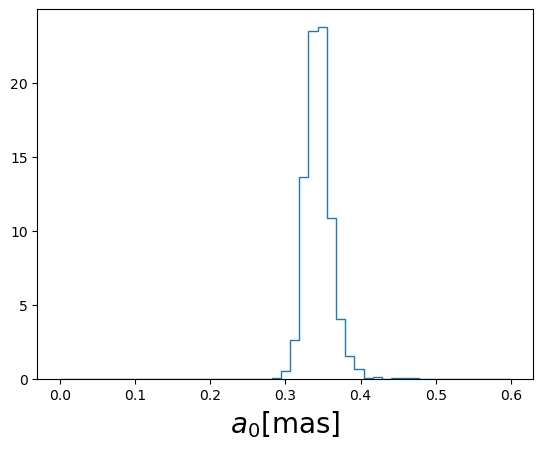

In [29]:
# how well is a0 constrained?
keep_P, keep_ecc, keep_phi_p = np.array(samples).T[keep].T
all_a0 = []

for i in range(len(keep_P)):

    period, phi_p, ecc = keep_P[i], keep_phi_p[i], keep_ecc[i]
    chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
    ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear

    a0_mas, inc, w, omega = gaiamock.get_Campbell_elements(A=A, B=B, F=F, G=G)
    all_a0.append(a0_mas)
_ = plt.hist(all_a0, bins=np.linspace(0, 0.6), histtype='step', density=True)
plt.xlabel(r'$a_0 [\rm mas]$', fontsize=20)

7 parameter solution accepted! Not trying anything else.
single star chi2: 714.28
7-parameter chi2: 392.02


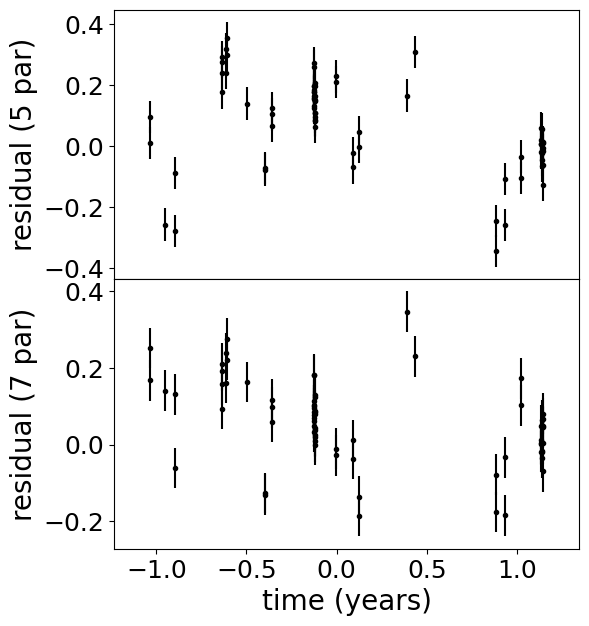

In [30]:
# would this orbit have passed the DR3 cuts if fit with the normal pipeline?

result = gaiamock.fit_full_astrometric_cascade(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, c_funcs = c_funcs, verbose=True, show_residuals=True)

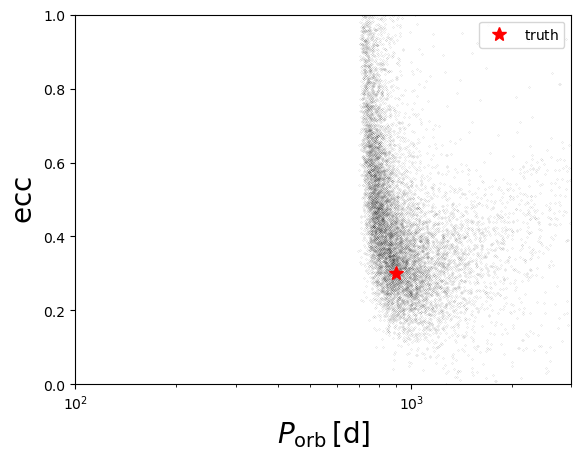

In [31]:
# similar, but a longer period. This will likely also be poorly constrained. 
t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 1.0, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 14.0, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)
samples = gaiamock.generate_prior_samples(N_samps = int(1e7), P_range = [100, 3000])
L = gaiamock.get_astrometric_likelihoods(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
                                         ast_obs = ast_obs, ast_err = ast_err, samples = samples)

r = np.random.uniform(0, np.max(L), len(L))
keep = L > r

f = plt.figure()
ax = f.add_subplot(111)
ax.semilogx(np.array(samples).T[keep].T[0], np.array(samples).T[keep].T[1], 'k.', ms=0.1)
ax.set_xlim(100, 3000)
ax.set_xlabel(r'$P_{\rm orb}\,[\rm d]$', fontsize=20)
ax.set_ylabel(r'$\rm ecc$', fontsize=20)
ax.set_ylim(0, 1)
ax.plot([900], [0.3], 'r*', label = r'$\rm truth$', ms=10)
ax.legend(loc = 'upper right')

In [10]:
# what if we run the standard pipeline? It should yield large uncertainties.
result = gaiamock.fit_full_astrometric_cascade(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, c_funcs = c_funcs, verbose=True, show_residuals=True)

UWE < 1.4: returning only 5-parameter solution.


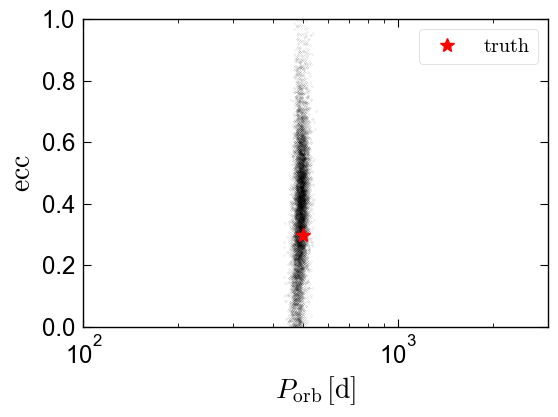

In [11]:
# put the 500-day binary even farther away

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 0.7, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 14.5, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)

samples = gaiamock.generate_prior_samples(N_samps = int(1e7), P_range = [100, 3000])
L = gaiamock.get_astrometric_likelihoods(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
                                         ast_obs = ast_obs, ast_err = ast_err, samples = samples)

# use rejection sampling to discard the ones with low relative likelihoods

r = np.random.uniform(0, np.max(L), len(L))
keep = L > r

f = plt.figure()
ax = f.add_subplot(111)
ax.semilogx(np.array(samples).T[keep].T[0], np.array(samples).T[keep].T[1], 'k.', ms=0.1)
ax.set_xlim(100, 3000)
ax.set_xlabel(r'$P_{\rm orb}\,[\rm d]$', fontsize=20)
ax.set_ylabel(r'$\rm ecc$', fontsize=20)
ax.set_ylim(0, 1)
ax.plot([500], [0.3], 'r*', label = r'$\rm truth$', ms=10)
ax.legend(loc = 'upper right')

Text(0.5, 0, '$a_0 [\\rm mas]$')

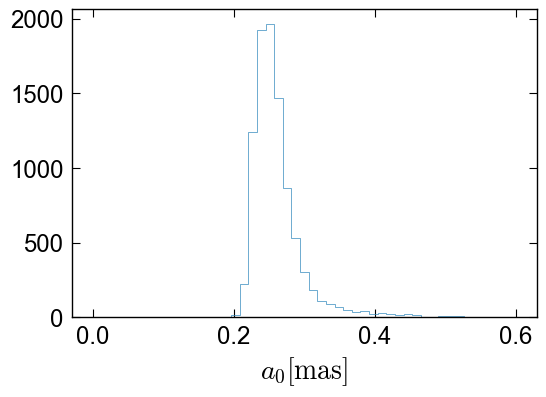

In [12]:
keep_P, keep_ecc, keep_phi_p = np.array(samples).T[keep].T
all_a0 = []

for i in range(len(keep_P)):

    period, phi_p, ecc = keep_P[i], keep_phi_p[i], keep_ecc[i]
    chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
    ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear

    a0_mas, inc, w, omega = gaiamock.get_Campbell_elements(A=A, B=B, F=F, G=G)
    all_a0.append(a0_mas)
_ = plt.hist(all_a0, bins=np.linspace(0, 0.6), histtype='step')
plt.xlabel(r'$a_0 [\rm mas]$', fontsize=20)

# takeaway: the period can be well constrained, even if a0 is not. 

In [13]:
# what if we run the standard pipeline? It should yield large uncertainties, or not give a solution at all. 
result = gaiamock.fit_full_astrometric_cascade(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, c_funcs = c_funcs, verbose=True, show_residuals=True)

UWE < 1.4: returning only 5-parameter solution.


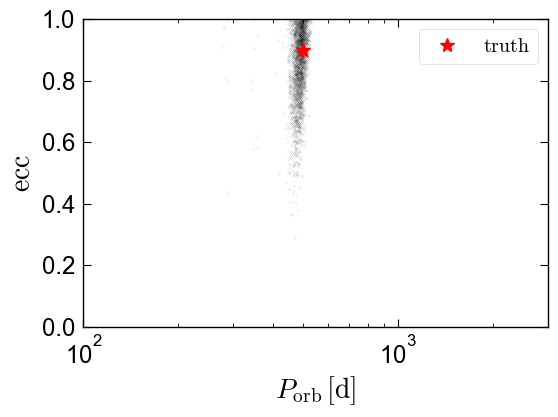

In [14]:
# let's try a case where the true eccentricity is high 

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 1.0, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.9, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 14.0, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)

samples = gaiamock.generate_prior_samples(N_samps = int(1e7), P_range = [100, 3000])
L = gaiamock.get_astrometric_likelihoods(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
                                         ast_obs = ast_obs, ast_err = ast_err, samples = samples)

# use rejection sampling to discard the ones with low relative likelihoods

r = np.random.uniform(0, np.nanmax(L), len(L))
keep = L > r

f = plt.figure()
ax = f.add_subplot(111)
ax.semilogx(np.array(samples).T[keep].T[0], np.array(samples).T[keep].T[1], 'k.', ms=0.1)
ax.set_xlim(100, 3000)
ax.set_xlabel(r'$P_{\rm orb}\,[\rm d]$', fontsize=20)
ax.set_ylabel(r'$\rm ecc$', fontsize=20)
ax.set_ylim(0, 1)
ax.plot([500], [0.9], 'r*', label = r'$\rm truth$', ms=10)
ax.legend(loc = 'upper right')

(0.0, 3.0)

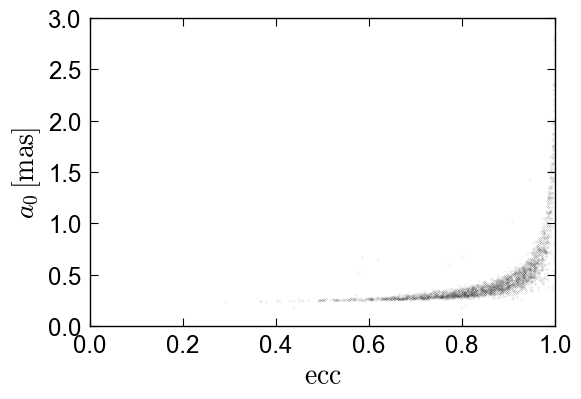

In [15]:
keep_P, keep_ecc, keep_phi_p = np.array(samples).T[keep].T
all_a0 = []

for i in range(len(keep_P)):

    period, phi_p, ecc = keep_P[i], keep_phi_p[i], keep_ecc[i]
    chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
    ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear

    a0_mas, inc, w, omega = gaiamock.get_Campbell_elements(A=A, B=B, F=F, G=G)
    all_a0.append(a0_mas)

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(np.array(samples).T[keep].T[1], all_a0, 'k.', ms=0.1)
ax.set_xlim(0, 1)
ax.set_xlabel(r'$\rm ecc$', fontsize=20)
ax.set_ylabel(r'$a_0\,[\rm mas]$', fontsize=20)
ax.set_ylim(0, 3)


In [38]:
# so what's happening here? Basically, if data do not rule out a very high eccentricity, 
# then there will be some very high eccentricity, large a0 orbits that are consistent with
# the data. This tail of orbits with large a0 leads to a0/a0_err being small, and the orbit
# not being constrained well enough to pass the DR3 cuts. Still, the period can be quite
# well-constrained. 

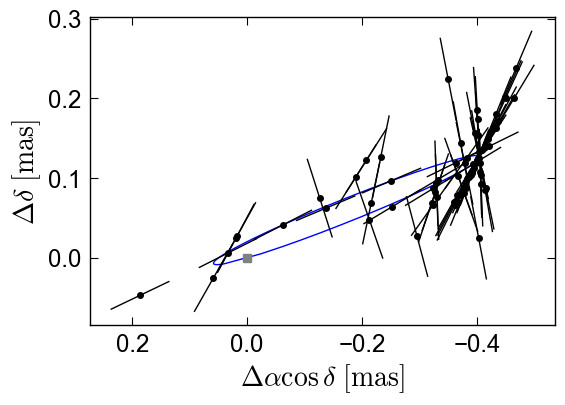

In [16]:
# plot the best-fit orbit
best = np.argmax(L)
period, ecc, phi_p = samples[0][best], samples[1][best], samples[2][best]
chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear


gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr, psi=psi, plx_factor=plx_factor, 
            ast_obs=ast_obs, ast_err=ast_err, period = period, ecc=ecc, Tp=phi_p*period/(2*np.pi),
            delta_ra=ra_off, delta_dec=dec_off, parallax=plx, pmra=pmra, pmdec=pmdec, 
            data_release='dr3', A=A, B=B, F=F, G=G, c_funcs=c_funcs)
